# 5.0 Data Visualizations

## 5.1 Animated Plot

In [50]:
def plot_world_pose_coordinates_custom(coordinates, elev, azim, title):
    filenames = []
    fig = plt.figure(figsize=(12, 12))
    
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(title)
    
    xs = [point[0] for point in coordinates]
    ys = [point[1] for point in coordinates]
    zs = [point[2] for point in coordinates]

    head_torso_connections = [(0, 1),(13, 14),(0, 13),(0, 14)]
    #torso_connections = [(2, 3),(3, 4),(4, 2)]
    torso_connections = [(2, 3),(3, 4),(3, 24),(2, 25),(24,25)]
    
    right_hand_connections = [(6, 15), (6, 16), (15, 16)]
    right_shoulder_connections = [(2, 5), (5, 6)]
    right_leg_connections = [(25, 9), (9, 10)]
    right_foot_connections = [(10, 20), (10, 21),(20,21)]
    
    left_hand_connections = [(8, 17), (8, 18), (17, 18)]
    left_shoulder_connections = [(3, 7), (7, 8)]
    left_leg_connections = [(24, 11), (11, 12)]  
    left_foot_connections = [(12, 22), (12, 23),(22,23)]
    
    ax.scatter(xs, zs, ys, color='black')

    def draw_connections(connections, color):
        for connection in connections:
            x_conn = [xs[connection[0]], xs[connection[1]]]
            y_conn = [ys[connection[0]], ys[connection[1]]]
            z_conn = [zs[connection[0]], zs[connection[1]]]
            ax.plot(x_conn, z_conn, y_conn, color=color, linewidth=2)

    draw_connections(head_torso_connections, 'darkseagreen')
    draw_connections(torso_connections, 'darkolivegreen')
    
    draw_connections(right_hand_connections, 'plum')
    draw_connections(right_shoulder_connections, 'plum')
    draw_connections(right_leg_connections, 'palevioletred')
    draw_connections(right_foot_connections, 'palevioletred')
    
    draw_connections(left_hand_connections, 'skyblue')
    draw_connections(left_shoulder_connections, 'skyblue')
    draw_connections(left_leg_connections, 'steelblue')
    draw_connections(left_foot_connections, 'steelblue')

    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_zlabel("")

    ax.set_xlim(np.min(xs)-0.01,np.max(xs)+0.01)
    ax.set_ylim(np.min(zs)-0.01,np.max(zs)+0.01)
    ax.set_zlim(np.min(ys)-0.01,np.max(ys)+0.01)

    ax.invert_xaxis()
    ax.invert_yaxis()
    ax.invert_zaxis()

    ax.set_xticks(np.arange(np.min(xs)-0.1, np.max(xs)+0.1, 0.1))
    ax.set_yticks(np.arange(np.min(zs)-0.1, np.max(zs)+0.1, 0.1))
    ax.set_zticks(np.arange(np.min(ys)-0.1, np.max(ys)+0.1, 0.1))

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])

    ax.set_facecolor('white')

    # Set the grid lines to be lighter
    ax.xaxis._axinfo["grid"]['color'] = (0.3, 0.3, 0.3, 0.1)
    ax.yaxis._axinfo["grid"]['color'] = (0.3, 0.3, 0.3, 0.1)
    ax.zaxis._axinfo["grid"]['color'] = (0.3, 0.3, 0.3, 0.1)

    ax.view_init(elev=elev, azim=azim)

   # filename = f"plot_azim_{azim}.png"
   # plt.savefig(filename)
   # filenames.append(filename)
   # plt.close(fig)

    plt.show()

def get_3d_coordinates_for_plot(df,i):
    coordinates = [
        (df.iloc[i]['landmark_00_x'], df.iloc[i]['landmark_00_y'], df.iloc[i]['landmark_00_z']), #0
        (df.iloc[i]['chest_x'], df.iloc[i]['chest_y'], df.iloc[i]['chest_z']), #1
        (df.iloc[i]['landmark_12_x'], df.iloc[i]['landmark_12_y'], df.iloc[i]['landmark_12_z']), #2
        (df.iloc[i]['landmark_11_x'], df.iloc[i]['landmark_11_y'], df.iloc[i]['landmark_11_z']), #3
        (df.iloc[i]['hip_x'], df.iloc[i]['hip_y'], df.iloc[i]['hip_z']), #4
        (df.iloc[i]['landmark_14_x'], df.iloc[i]['landmark_14_y'], df.iloc[i]['landmark_14_z']), #5
        (df.iloc[i]['landmark_16_x'], df.iloc[i]['landmark_16_y'], df.iloc[i]['landmark_16_z']), #6
        (df.iloc[i]['landmark_13_x'], df.iloc[i]['landmark_13_y'], df.iloc[i]['landmark_13_z']), #7
        (df.iloc[i]['landmark_15_x'], df.iloc[i]['landmark_15_y'], df.iloc[i]['landmark_15_z']), #8
        (df.iloc[i]['landmark_26_x'], df.iloc[i]['landmark_26_y'], df.iloc[i]['landmark_26_z']), #9
        (df.iloc[i]['landmark_28_x'], df.iloc[i]['landmark_28_y'], df.iloc[i]['landmark_28_z']), #10
        (df.iloc[i]['landmark_25_x'], df.iloc[i]['landmark_25_y'], df.iloc[i]['landmark_25_z']), #11
        (df.iloc[i]['landmark_27_x'], df.iloc[i]['landmark_27_y'], df.iloc[i]['landmark_27_z']), #12
        (df.iloc[i]['landmark_08_x'], df.iloc[i]['landmark_08_y'], df.iloc[i]['landmark_08_z']), #13
        (df.iloc[i]['landmark_07_x'], df.iloc[i]['landmark_07_y'], df.iloc[i]['landmark_00_z']), #14
        (df.iloc[i]['landmark_18_x'], df.iloc[i]['landmark_18_y'], df.iloc[i]['landmark_18_z']), #15
        (df.iloc[i]['landmark_22_x'], df.iloc[i]['landmark_22_y'], df.iloc[i]['landmark_22_z']), #16
        (df.iloc[i]['landmark_17_x'], df.iloc[i]['landmark_17_y'], df.iloc[i]['landmark_17_z']), #17
        (df.iloc[i]['landmark_21_x'], df.iloc[i]['landmark_21_y'], df.iloc[i]['landmark_21_z']), #18
        (df.iloc[i]['landmark_21_x'], df.iloc[i]['landmark_21_y'], df.iloc[i]['landmark_21_z']), #19
        (df.iloc[i]['landmark_30_x'], df.iloc[i]['landmark_30_y'], df.iloc[i]['landmark_30_z']), #20
        (df.iloc[i]['landmark_32_x'], df.iloc[i]['landmark_32_y'], df.iloc[i]['landmark_32_z']), #21
        (df.iloc[i]['landmark_29_x'], df.iloc[i]['landmark_29_y'], df.iloc[i]['landmark_29_z']), #22
        (df.iloc[i]['landmark_31_x'], df.iloc[i]['landmark_31_y'], df.iloc[i]['landmark_31_z']), #23
        
        (df.iloc[i]['landmark_23_x'], df.iloc[i]['landmark_23_y'], df.iloc[i]['landmark_23_z']), #24
        (df.iloc[i]['landmark_24_x'], df.iloc[i]['landmark_24_y'], df.iloc[i]['landmark_24_z']), #25
    ]
    return coordinates

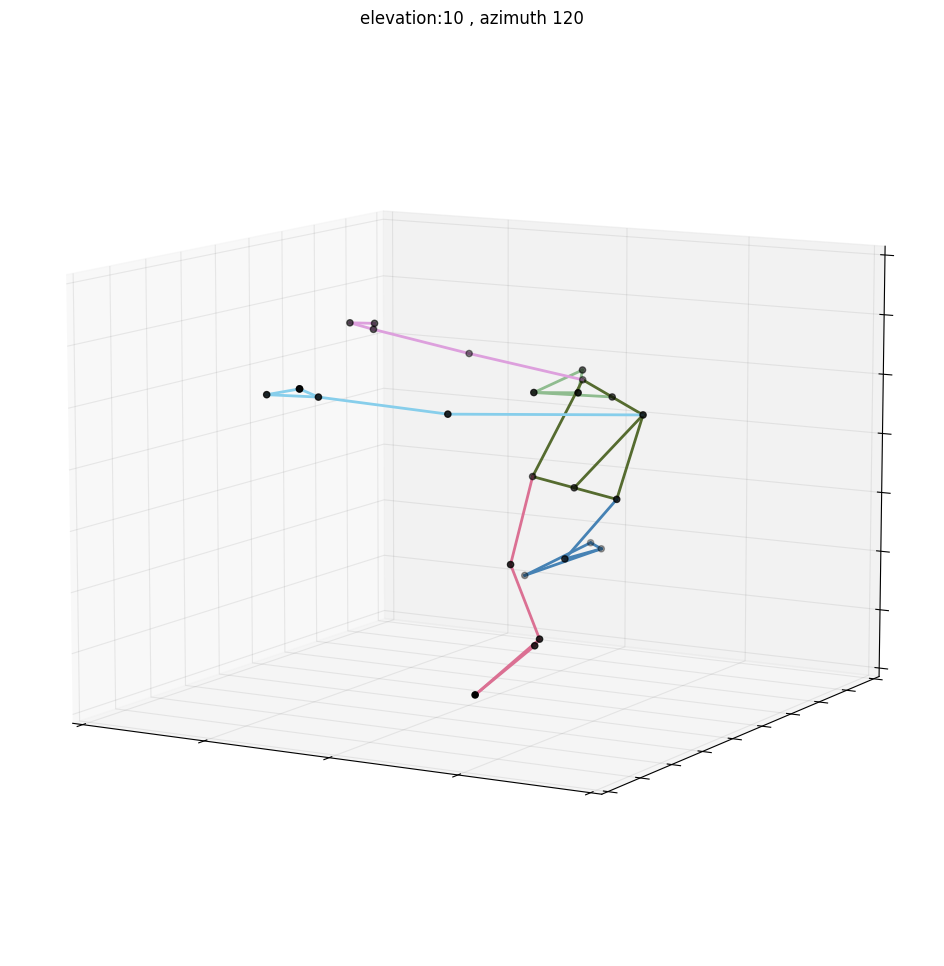

In [53]:
pose_coordinates = get_3d_coordinates_for_plot(pose_df,1)
plot_world_pose_coordinates_custom(pose_coordinates, 10, 120, "elevation:10 , azimuth 120")

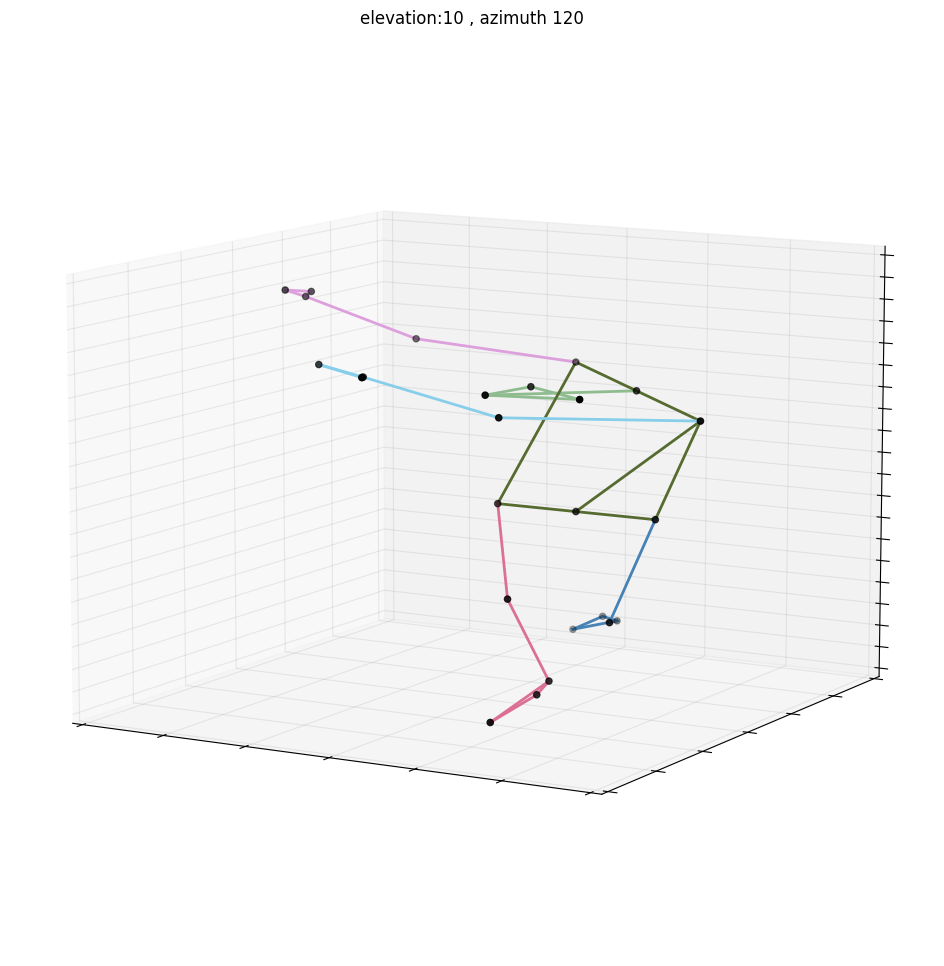

In [54]:
pose_coordinates = get_3d_coordinates_for_plot(pose_world_df,1)
plot_world_pose_coordinates_custom(pose_coordinates, 10, 120, "elevation:10 , azimuth 120")

## 5.2.1 Music-Movement Synchronicity

In [ ]:
fig, ax = plt.subplots(figsize=(24, 12))

for i, item in enumerate(kd_v.columns):
    ax.scatter(kd_v.index, kd_v[item], label=item)
y, sr = librosa.load(video_file_path)
y_harm, y_perc = librosa.effects.hpss(y)
librosa.display.waveshow(y_perc, sr=sr, color='red', alpha=0.2, ax=ax, label='Percussive')
ax.set_xlim([2, 31])
ax.set_xticks(np.arange(2, 31, step=1))
ax.grid()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fancybox=True, shadow=True)
fig.tight_layout()

## 5.2.2 HR-Movement Synchronicity

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import write

hrv_data = pd.read_csv('docs/data/polar_hrv.csv')

hrv_data = hrv_data.iloc[2:, 1:3].reset_index(drop=True)
hrv_data.columns = ['seconds', 'bpm']
hrv_data

hrv_data['bpm'] = pd.to_numeric(hrv_data['bpm'], errors='coerce')

print(len(hrv_data))


def generate_beat_sound(hrv_data, sample_rate=44100, frequency=440, volume=0.01):
    intervals = 60 / hrv_data['bpm']  # intervals between beats in seconds
    durations = np.minimum(intervals / 5, 0.3)  # duration of each beat sound
    total_duration = np.sum(intervals)
    sound_wave = np.zeros(int(total_duration * sample_rate))

    current_sample = 0
    for interval, duration in zip(intervals, durations):
        beep_length = int(duration * sample_rate)
        silence_length = int((interval - duration) * sample_rate)        
        beep = np.sin(np.linspace(0, duration * frequency * 2 * np.pi, beep_length))
        beep = (beep * volume * 32767).astype(np.int16)
        
        sound_wave[current_sample:current_sample + beep_length] = beep
        current_sample += beep_length + silence_length

    # Output path for the WAV file
    output_path = 'heartbeat_sound.wav'
    write(output_path, sample_rate, sound_wave)

    return output_path


# Use the function with your hrv_data DataFrame
output_path = generate_beat_sound(hrv_data)

# Output path is the file path where the heartbeat sound is saved
print(f"Heartbeat sound has been saved to: {output_path}")